Note: This is a Guided project from DataQuest. The data and code in Part I was part of the course. Part II is my original work. 

# Part I

# Overview of the Data

Import pandas and sqlite3.
Connect to factbook.db and use pandas.read_sql_query() to return information on the tables in the database.

In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect ("factbook.db")
cursor = conn.cursor()
q1 = "SELECT * FROM SQlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)
cursor.execute(q1).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

Write and run another query that returns the first 5 rows of the facts table in the database.

In [2]:
q2 = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


# Summary Statistics

Write a single query that returns the minimum population, maximum population, minimum population growth, and maximum population growth

In [3]:
q3 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;"
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


# Exploring Outliers

Write a query that returns the countrie(s) with a population of 0.
Write a query that returns the countrie(s) with a population of 7256490011.

In [4]:
q4 = "SELECT * FROM facts WHERE population = 0"
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


Write a query that returns the countrie(s) with a population of 7256490011.

In [5]:
q5 = "SELECT * FROM facts WHERE population = 7256490011"
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


The table contains a row for Antarctica, which explains the population of 0. It also contains a row for the whole world, which explains the population of over 7.2 billion.

# Histograms

Using just the non-outlier rows, generate a 2 by 2 grid of histograms for the following columns: population, population_growth, birth_rate, and death_rate.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013EB1BE0>,
      dtype=object)

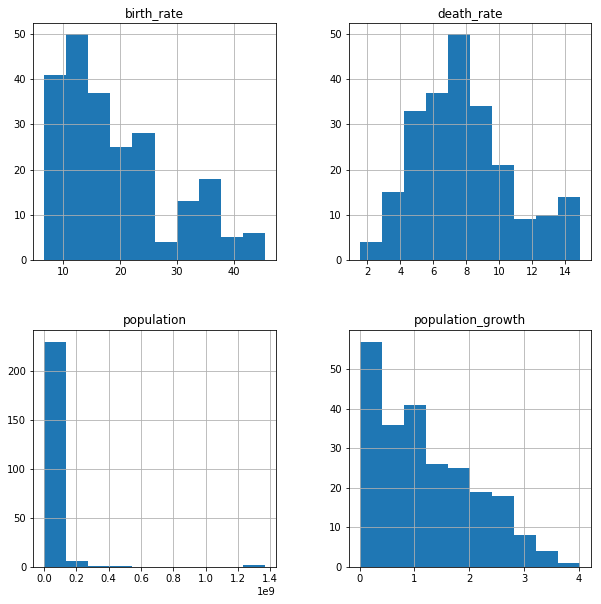

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q6, conn).hist(ax=ax)

Which countries have the highest population density?
Population density is the ratio of population to land area. 

In [14]:
q7 = "select name, cast(population as float)/cast(area as float) density from facts order by density desc limit 20"
pd.read_sql_query(q7, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


# Part II. Next Steps

Generate a histogram of population densities.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017107E10>],
      dtype=object)

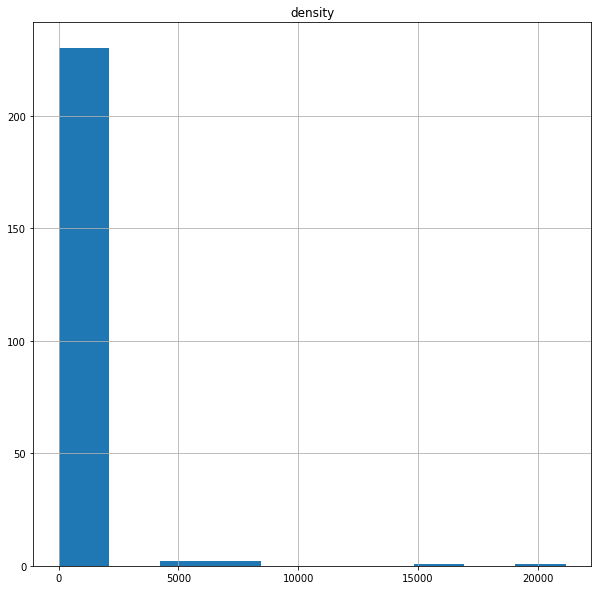

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q8 = "select name, cast(population as float)/cast(area as float) density from facts;"
pd.read_sql_query(q8, conn).hist(ax=ax)

Which countries have the highest ratios of water to land? Which countries have more water than land?

In [24]:
q9 = "select name, cast(area_water as float)/cast(area_land as float) water_land_ratio from facts order by water_land_ratio desc limit 20"
pd.read_sql_query(q9, conn)

,name,water_land_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


From this table, it's clear that British Indian Ocean Territory and Virgin Islands have more water than land. Here is another way to answer the same question.

In [25]:
q10 = "select name, area_land, area_water from facts where area_water > area_land"
pd.read_sql_query(q10, conn)

,name,area_land,area_water
0,British Indian Ocean Territory,60,54340
1,Virgin Islands,346,1564


Find the top 20 countries by migration rate.

In [30]:
q11 = "select name, migration_rate from facts order by migration_rate DESC limit 20"
pd.read_sql_query(q11, conn)

,name,migration_rate
0,Qatar,22.39
1,American Samoa,21.13
2,"Micronesia, Federated States of",20.93
3,Syria,19.79
4,Tonga,17.84
5,British Virgin Islands,17.28
6,Luxembourg,17.16
7,Cayman Islands,14.40
8,Singapore,14.05
9,Nauru,13.63


Find countries where birth rate (ratio of live births to the population of that country) is above average.

In [40]:
q12 = "select name, birth_rate from facts where birth_rate > (select AVG(birth_rate) from facts) order by birth_rate desc limit 10"
pd.read_sql_query(q12, conn)

,name,birth_rate
0,Niger,45.45
1,Mali,44.99
2,Uganda,43.79
3,Zambia,42.13
4,Burkina Faso,42.03
5,Burundi,42.01
6,Malawi,41.56
7,Somalia,40.45
8,Angola,38.78
9,Mozambique,38.58


Find countries where death rate (ratio of deaths to the population of that country) is above average.

In [42]:
q13 = "select name, death_rate from facts where death_rate > (select AVG(death_rate) from facts) order by death_rate desc limit 20"
pd.read_sql_query(q13, conn)

,name,death_rate
0,Lesotho,14.89
1,Ukraine,14.46
2,Bulgaria,14.44
3,Guinea-Bissau,14.33
4,Latvia,14.31
5,Chad,14.28
6,Lithuania,14.27
7,Namibia,13.91
8,Afghanistan,13.89
9,Central African Republic,13.80
